https://erdogant.github.io/bnlearn/pages/html/Quickstart.html

[bnlearn] >Import dataset..
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


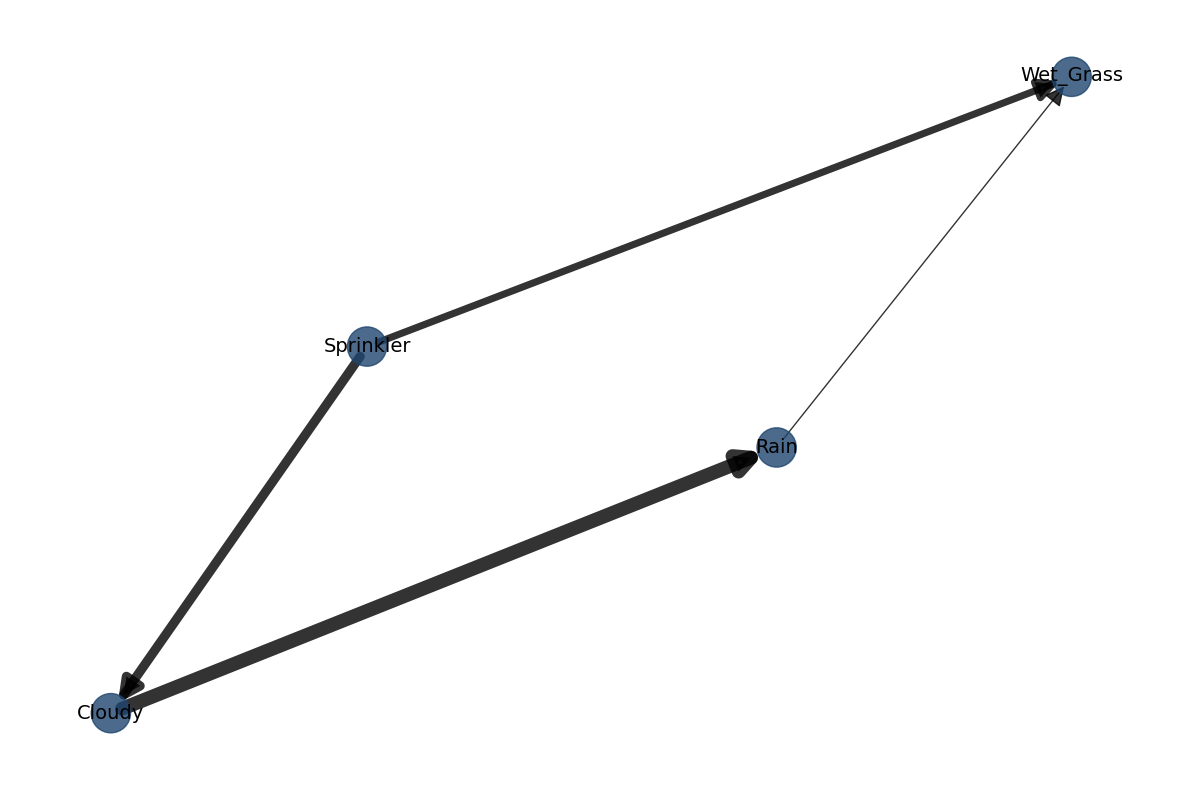

In [1]:
import bnlearn as bn

df = bn.import_example()
model = bn.structure_learning.fit(df)
model = bn.independence_test(model, df)
G = bn.plot(model)

[bnlearn] >Import <sprinkler>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Import dataset..
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   Rain |         p |
+====+========+===========+
|  0 |      0 | 0.0241546 |
+----+--------+-----------+
|  1 |      1 | 0.975845  |
+----+--------+-----------+
   Rain         p
0     0  0.024155
1     1  0.975845
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cloudy:
+-----------+---------------------+-----+---------------------+
| Sprinkler | Sprinkler(0)        | ... | Sprinkler(1)        |
+-----------+---------------------+-----+---------------------+
| Wet_Grass | Wet_Grass(0)        | ... | Wet_Grass

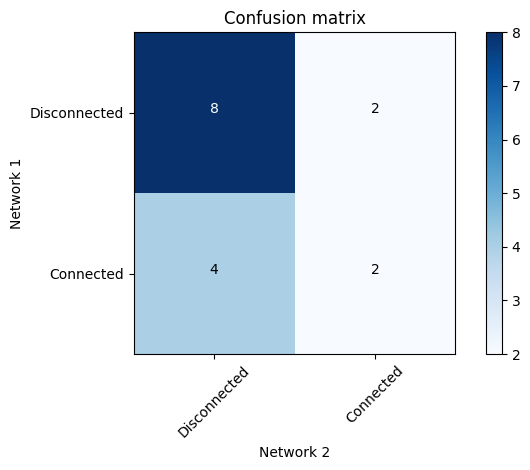

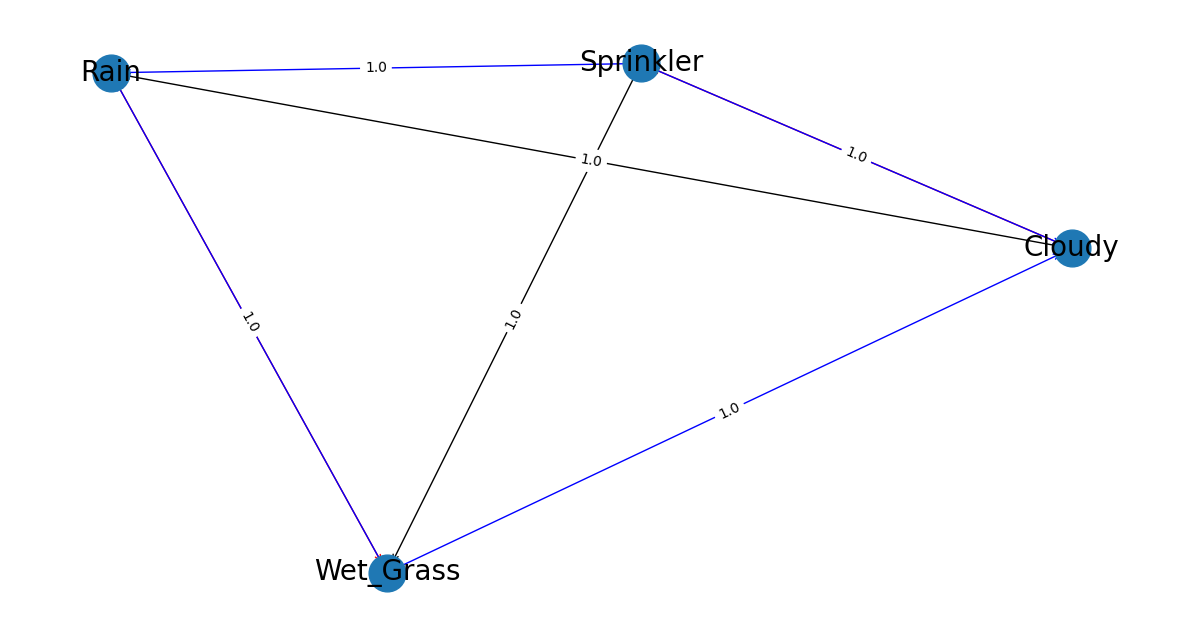

In [2]:
import bnlearn as bn

model = bn.import_DAG('sprinkler')

df = bn.import_example()
df = bn.sampling(model)
query = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1, 'Wet_Grass':1})
print(query.df)
model_sl = bn.structure_learning.fit(df)
model_pl = bn.parameter_learning.fit(model_sl, df)
scores, adjmat = bn.compare_networks(model_sl, model)